>) Observable Trends:
1) Rural fares tend to be higher than Urban and Suburban, as one would expect given the relative isolation of rural areas
2) Suburban drivers represent 16.5% of all drivers, yet represent 30.5% of all fares
3) This is in stark contrast to the Urban data, wherein Urban drivers represent 80.9% of all drivers but only represent 62.7% of all fares

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city = pd.read_csv("city_data.csv")
ride = pd.read_csv("ride_data.csv")

# Combine the data into a single dataset
combined = pd.merge(ride, city, on='city', how='left')

# Display the data table for preview
combined.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

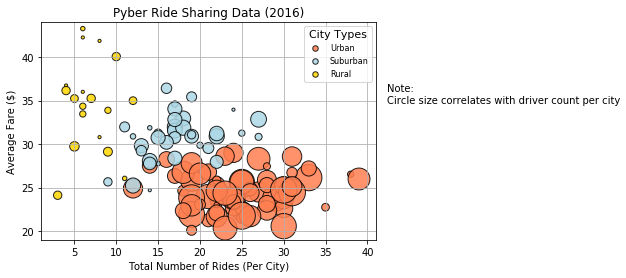

In [41]:
# Obtain the x and y coordinates for each of the three city types
urban = combined.loc[combined['type']=='Urban',['city','fare','driver_count']]
urban_x = urban.groupby(['city'])['fare'].count()
urban_y = urban.groupby(['city'])['fare'].mean()
urban_s = urban.groupby(['city'])['driver_count'].mean()
suburban = combined.loc[combined['type']=='Suburban',['city','fare','driver_count']]
suburban_x = suburban.groupby(['city'])['fare'].count()
suburban_y = suburban.groupby(['city'])['fare'].mean()
suburban_s = suburban.groupby(['city'])['driver_count'].mean()
rural = combined.loc[combined['type']=='Rural',['city','fare','driver_count']]
rural_x = rural.groupby(['city'])['fare'].count()
rural_y = rural.groupby(['city'])['fare'].mean()
rural_s = rural.groupby(['city'])['driver_count'].mean()

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, s=10*urban_s, marker="o", facecolors="coral", edgecolors="black", alpha=0.85, label="Urban")
plt.scatter(suburban_x, suburban_y, s=10*suburban_s, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.85, label="Suburban")
plt.scatter(rural_x, rural_y, s=10*rural_s, marker="o", facecolors="gold", edgecolors="black", alpha=0.85, label="Rural")

# Incorporate the other graph properties
plt.xlim(1,41)
plt.ylim(19,44)
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lh = plt.legend(loc="upper right", fontsize="8", title="City Types", title_fontsize="11")
for handle in lh.legendHandles:
    handle.set_sizes([30.0])

# Incorporate a text label regarding circle size
plt.figtext(0.925,0.6,"Note:" + "\n" + "Circle size correlates with driver count per city")

# Save Figure
plt.savefig("Scatter.png", bbox_inches = "tight")

## Total Fares by City Type

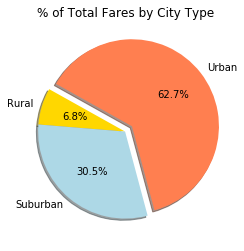

In [34]:
explode = (0.1,0,0)
t_labels = ["Urban","Rural","Suburban"]
t_colors = ["coral","gold","lightblue"]

# Calculate Type Percents
pies_fares = [urban['fare'].sum(),rural['fare'].sum(),suburban['fare'].sum()]

# Build Pie Chart
plt.pie(pies_fares, explode=explode, labels=t_labels, colors=t_colors, autopct="%1.1f%%", shadow=True, startangle=-75)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Fares.png")

## Total Rides by City Type

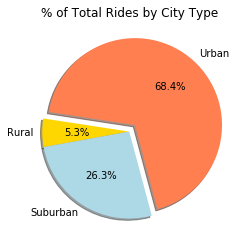

In [31]:
# Calculate Ride Percents
pies_rides = [urban['fare'].count(),rural['fare'].count(),suburban['fare'].count()]

# Build Pie Chart
plt.pie(pies_rides, explode=explode, labels=t_labels, colors=t_colors, autopct="%1.1f%%", shadow=True, startangle=-75)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Rides.png")

## Total Drivers by City Type

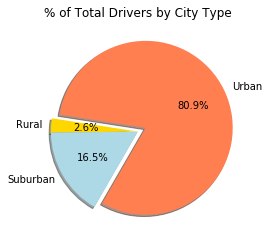

In [32]:
# Calculate Driver Percents
pies_drivers = city.groupby(['type'])['driver_count'].sum().tolist()
pies_drivers.insert(0, pies_drivers.pop(2))

# Build Pie Charts
plt.pie(pies_drivers, explode=explode, labels=t_labels, colors=t_colors, autopct="%1.1f%%", shadow=True, startangle=-120)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Drivers.png")